# Laboratorio 2 - Agrupación
Grupo: 
- 21

Integrantes:
- Jhoan Sebastian Sánchez Suarez - 202215911
- Pablo Méndez Morales - 202210379
- Juan Diego Sánchez - 202214625

In [232]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score
from matplotlib import cm
import numpy as np

# Carga de datos

In [233]:
df=pd.read_csv('data/202510_Laboratorio 2 - Agrupación_Customer_Data.csv', encoding='latin1', sep=';')
df.sample(5)

,ID,SALDO,F_SALDO,COMPRAS,COMPRAS_PUNTUALES,COMPRAS_PLAZOS,AVANCE_EFECTIVO,F_COMPRAS,F_COMPRAS_PUNTUALES,F_COMPRAS_PLAZOS,F_AVANCE_EFECTIVO,P_AVANCE_EFECTIVO,P_COMPRAS,LÍMITE_CREDITO,PAGOS,PAGOS_MINIMOS,F_PAGOS_COMPLETOS,MESES_CLIENTE
1219,C11220,12533.023820,0.763799,41957.028340,5805.352909,19723.370200,40016.342510,0.822756,0.089750,0.555507,1.049210,85,213,12340.120290,4726.274638,66347.81540,0.411312,9
3022,C13023,5956.040429,0.141098,28464.686820,35868.826420,3409.704691,12550.212830,0.510540,0.481260,0.769880,0.094634,79,76,14536.769770,25794.988650,35005.85134,0.814559,7
5457,C15458,16453.876580,0.228463,6274.299644,34249.483280,11700.810950,16913.155330,0.542257,0.606097,0.683303,0.932925,38,179,4592.330695,20881.474600,61966.91339,0.012137,7
6777,C16778,12457.755220,0.762997,41220.180100,6552.746872,20289.692130,38393.898990,0.801104,0.168634,0.493620,1.019587,73,260,16270.594740,6716.351702,60224.40917,0.449494,10
7834,C17835,4768.971387,0.534638,25324.233440,29126.817190,10676.843290,8963.310914,0.148695,0.704261,0.137407,1.392029,35,270,24563.584980,43939.676510,12123.73523,0.744327,11


# Entendimiento de los datos

## Perfilamiento

Cada fila del documento representa un cliente y datos de compras, saldo y la frecuencia con la que realiza algunas operaciones.

In [234]:
#tamaño de datos
df.shape

(8950, 18)

### Completitud

In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   8950 non-null   object 
 1   SALDO                8950 non-null   float64
 2   F_SALDO              8950 non-null   float64
 3   COMPRAS              8950 non-null   float64
 4   COMPRAS_PUNTUALES    8950 non-null   float64
 5   COMPRAS_PLAZOS       8950 non-null   float64
 6   AVANCE_EFECTIVO      8950 non-null   float64
 7   F_COMPRAS            8950 non-null   float64
 8   F_COMPRAS_PUNTUALES  8950 non-null   float64
 9   F_COMPRAS_PLAZOS     8950 non-null   float64
 10  F_AVANCE_EFECTIVO    8950 non-null   float64
 11  P_AVANCE_EFECTIVO    8950 non-null   int64  
 12  P_COMPRAS            8950 non-null   int64  
 13  LÍMITE_CREDITO       8949 non-null   float64
 14  PAGOS                8950 non-null   float64
 15  PAGOS_MINIMOS        8637 non-null   f

In [236]:
df.isnull().sum()

ID                       0
SALDO                    0
F_SALDO                  0
COMPRAS                  0
COMPRAS_PUNTUALES        0
COMPRAS_PLAZOS           0
AVANCE_EFECTIVO          0
F_COMPRAS                0
F_COMPRAS_PUNTUALES      0
F_COMPRAS_PLAZOS         0
F_AVANCE_EFECTIVO        0
P_AVANCE_EFECTIVO        0
P_COMPRAS                0
LÍMITE_CREDITO           1
PAGOS                    0
PAGOS_MINIMOS          313
F_PAGOS_COMPLETOS        0
MESES_CLIENTE            0
dtype: int64

Se observan los datos para la completitud y se descubren que hay registros con valores nulos.

In [237]:
#valores nulos de límite crédito
df[df['LÍMITE_CREDITO'].isnull()]

,ID,SALDO,F_SALDO,COMPRAS,COMPRAS_PUNTUALES,COMPRAS_PLAZOS,AVANCE_EFECTIVO,F_COMPRAS,F_COMPRAS_PUNTUALES,F_COMPRAS_PLAZOS,F_AVANCE_EFECTIVO,P_AVANCE_EFECTIVO,P_COMPRAS,LÍMITE_CREDITO,PAGOS,PAGOS_MINIMOS,F_PAGOS_COMPLETOS,MESES_CLIENTE
2223,C12224,5386.597701,0.195623,31058.11769,38490.60757,5292.917978,7599.445162,0.468313,0.421218,0.915907,0.242276,77,67,NaN,22641.87163,31840.28183,0.840785,6


In [238]:
# valores nulos de pagos minimos
df[df['PAGOS_MINIMOS'].isnull()]

,ID,SALDO,F_SALDO,COMPRAS,COMPRAS_PUNTUALES,COMPRAS_PLAZOS,AVANCE_EFECTIVO,F_COMPRAS,F_COMPRAS_PUNTUALES,F_COMPRAS_PLAZOS,F_AVANCE_EFECTIVO,P_AVANCE_EFECTIVO,P_COMPRAS,LÍMITE_CREDITO,PAGOS,PAGOS_MINIMOS,F_PAGOS_COMPLETOS,MESES_CLIENTE
2,C10003,4305.572068,0.176531,28392.953340,36009.470090,2873.383232,14294.18503,0.419764,0.523662,0.899912,0.207049,72,81,15515.586210,27111.360490,NaN,0.829074,6
31,C10032,3310.590886,0.599920,31427.680340,29692.273750,9395.804625,12119.27183,0.241004,0.759244,0.192674,1.353220,28,307,27471.470630,42788.566250,NaN,0.748458,11
45,C10046,14893.094970,0.754369,43348.871500,7196.968679,20440.098640,36786.55161,0.758416,0.211381,0.501564,0.828791,89,183,16223.672510,8064.315833,NaN,0.377104,10
53,C10054,13030.318170,0.767215,41541.292300,4084.981848,19163.859250,37746.28868,0.854852,0.244613,0.493249,1.065783,97,244,11722.581050,12306.438970,NaN,0.433215,10
78,C10079,3514.910807,0.181879,28067.685300,35318.373000,2660.913729,12034.56947,0.451773,0.494646,0.791138,0.143462,80,65,17314.285730,28487.355700,NaN,0.866448,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8922,C18923,2712.167972,0.282046,28536.331890,35580.354640,4425.331588,18613.02233,0.359371,0.575407,0.860808,0.408806,82,72,14918.052730,21416.015690,NaN,0.920035,6
8929,C18930,6039.746284,0.223305,32230.694630,34187.764740,3450.289051,10161.10731,0.467539,0.569357,0.810294,0.124760,80,97,13346.607000,26226.982450,NaN,0.816095,6
8934,C18935,3907.309029,0.229597,30254.878710,31994.886640,3183.752172,12765.06700,0.406941,0.659441,0.844801,0.276053,74,84,16760.975030,24010.894490,NaN,0.858690,6
8938,C18939,16551.038470,0.099458,8163.267932,33988.691350,10175.408990,16704.32565,0.603985,0.656120,0.750198,1.016616,46,146,1852.802394,17727.359190,NaN,0.165054,8


Se eliminan estos registros porque no son una cantidad considerable y no se justifica reemplazarlos de ninguna forma

In [239]:
df_trabajo=df.dropna(subset=['LÍMITE_CREDITO', 'PAGOS_MINIMOS'])

In [240]:
df_trabajo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8636 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   8636 non-null   object 
 1   SALDO                8636 non-null   float64
 2   F_SALDO              8636 non-null   float64
 3   COMPRAS              8636 non-null   float64
 4   COMPRAS_PUNTUALES    8636 non-null   float64
 5   COMPRAS_PLAZOS       8636 non-null   float64
 6   AVANCE_EFECTIVO      8636 non-null   float64
 7   F_COMPRAS            8636 non-null   float64
 8   F_COMPRAS_PUNTUALES  8636 non-null   float64
 9   F_COMPRAS_PLAZOS     8636 non-null   float64
 10  F_AVANCE_EFECTIVO    8636 non-null   float64
 11  P_AVANCE_EFECTIVO    8636 non-null   int64  
 12  P_COMPRAS            8636 non-null   int64  
 13  LÍMITE_CREDITO       8636 non-null   float64
 14  PAGOS                8636 non-null   float64
 15  PAGOS_MINIMOS        8636 non-null   float6

Se describen las variables estadísticamente

In [241]:
df_trabajo.describe()

,SALDO,F_SALDO,COMPRAS,COMPRAS_PUNTUALES,COMPRAS_PLAZOS,AVANCE_EFECTIVO,F_COMPRAS,F_COMPRAS_PUNTUALES,F_COMPRAS_PLAZOS,F_AVANCE_EFECTIVO,P_AVANCE_EFECTIVO,P_COMPRAS,LÍMITE_CREDITO,PAGOS,PAGOS_MINIMOS,F_PAGOS_COMPLETOS,MESES_CLIENTE
count,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000
mean,9383.315225,0.458869,30506.644432,22919.437163,11402.867473,22572.448971,0.559650,0.478428,0.624101,0.734601,76.166975,164.886174,14690.792408,19819.133774,44224.411642,0.545337,8.369152
std,5120.278788,0.282995,11043.384680,13567.922117,7086.859792,12588.448346,0.213905,0.221663,0.208025,0.422409,22.237366,71.263041,5526.888941,11064.989216,15468.635869,0.267686,1.755631
min,0.000000,0.000000,0.000000,916.121374,0.000000,0.000000,0.000000,0.031308,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,1006.064965,0.000000,6.000000
25%,4274.662323,0.188398,27104.936342,6700.821865,3737.123061,10953.982467,0.407487,0.251875,0.518437,0.230676,65.000000,97.000000,13485.387555,9321.637941,31571.869243,0.336445,7.000000
50%,12012.129670,0.305396,30920.065455,31014.788550,10826.957970,19471.666280,0.504715,0.533603,0.607608,0.947896,82.000000,176.000000,14945.262580,21364.638450,48786.419665,0.432607,8.000000
75%,13743.718880,0.756067,39808.933265,34490.217572,19131.456735,36151.178305,0.777007,0.648637,0.814979,1.028778,92.000000,216.000000,16263.164765,25212.785518,57761.830637,0.815615,10.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


### Validez
Para validez de los datos se observa que no hay valores negativos (que no tendrían sentido) en ninguna de las columnas.

In [242]:
df_trabajo['F_AVANCE_EFECTIVO'][df_trabajo['F_AVANCE_EFECTIVO']>1].count()

2932

Esta es la única columna que no es coherente con el diccionario de datos, ya que tiene datos mayores al máximo indicado. De esta forma, se realiza la siguiente transformación de forma que todos los elementos con datos mayores que 1 se vuelven 1. Esto debido a que se considera que se podrían perder datos valiosos al establecer el núevo máximo como nuevo 1.

In [243]:
df_trabajo['F_AVANCE_EFECTIVO']=df_trabajo['F_AVANCE_EFECTIVO'].apply(lambda x: 1 if x>1 else x)

C:\Users\juand\AppData\Local\Temp\ipykernel_12308\903006372.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trabajo['F_AVANCE_EFECTIVO']=df_trabajo['F_AVANCE_EFECTIVO'].apply(lambda x: 1 if x>1 else x)


#### Visualización

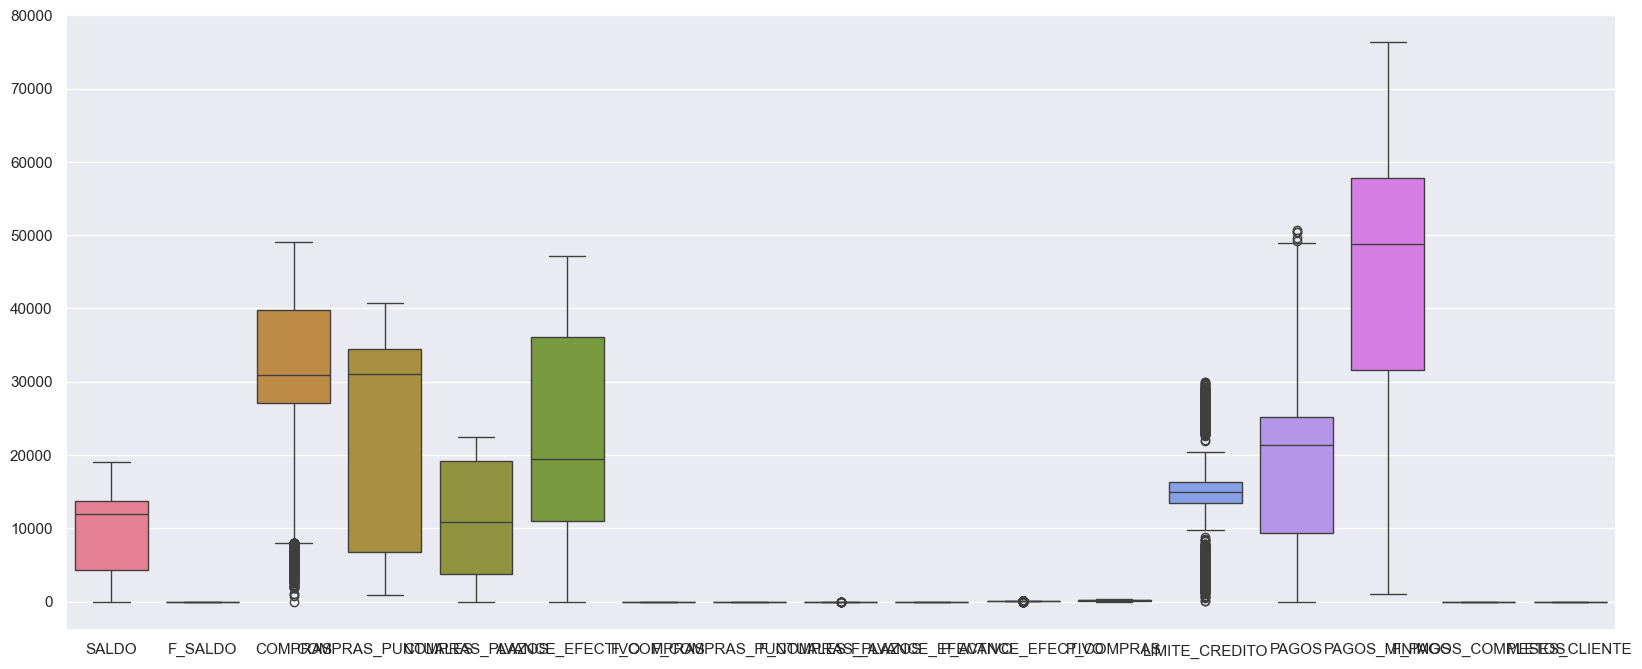

In [244]:
fig= plt.figure(figsize=(20,8))
ax = sns.boxplot(data=df_trabajo, orient="v")

Se filtran por los más cercanos en rango

In [245]:
a=df_trabajo.columns.drop(['ID','MESES_CLIENTE','SALDO','COMPRAS','COMPRAS_PUNTUALES','AVANCE_EFECTIVO','COMPRAS_PLAZOS','P_AVANCE_EFECTIVO', 'P_COMPRAS', 'LÍMITE_CREDITO', 'PAGOS', 'PAGOS_MINIMOS' ])
b=df_trabajo.columns.drop(list(a)).drop(['ID', 'MESES_CLIENTE','P_AVANCE_EFECTIVO', 'P_COMPRAS'])
c=df_trabajo.columns.drop(list(a)).drop(list(b)).drop(['ID','MESES_CLIENTE'])

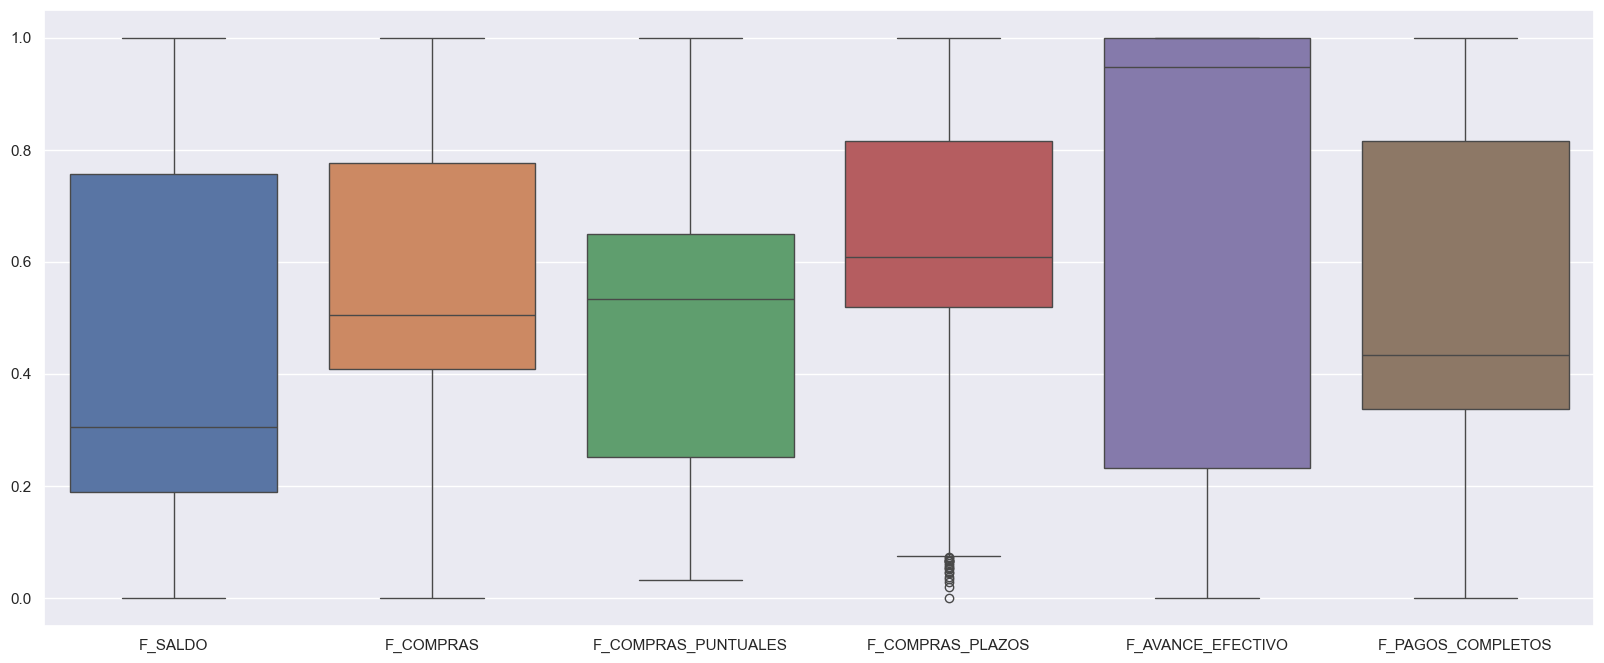

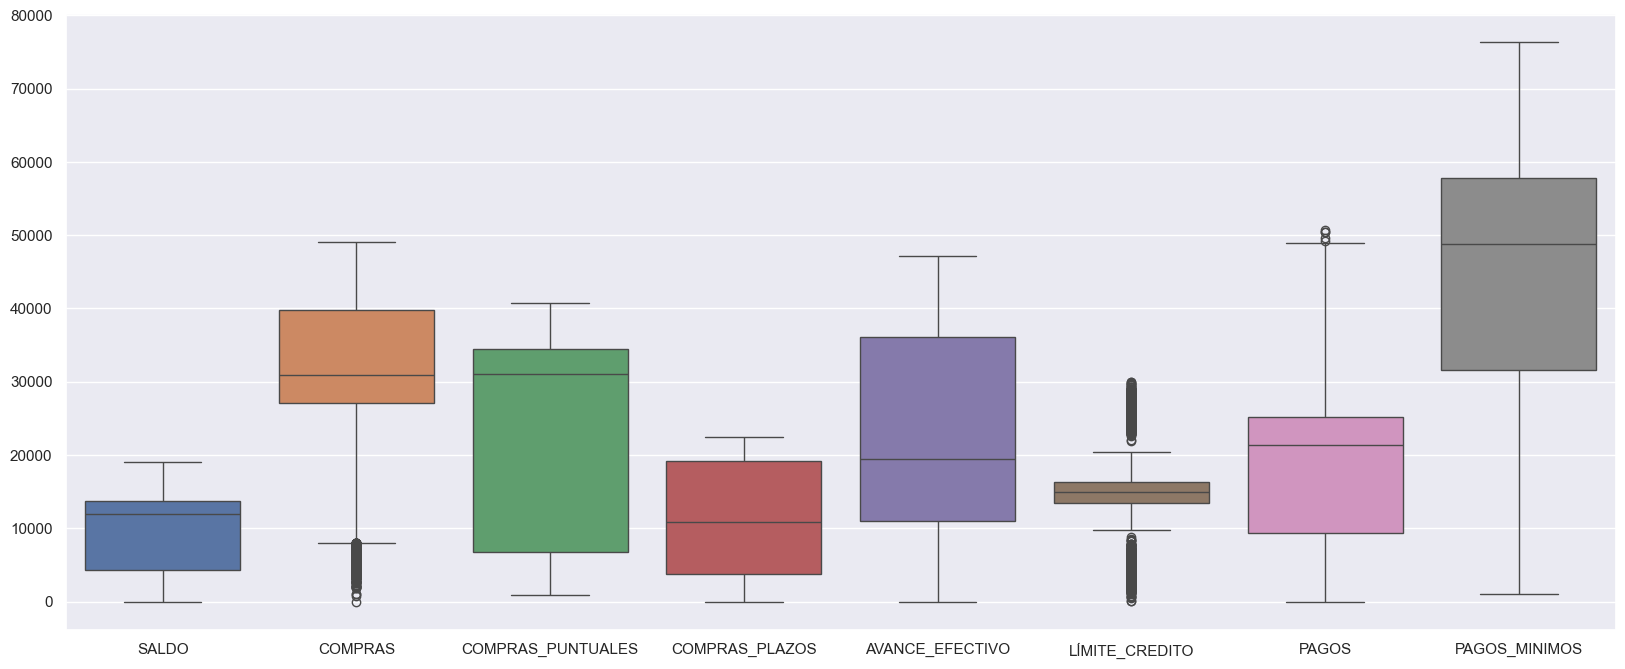

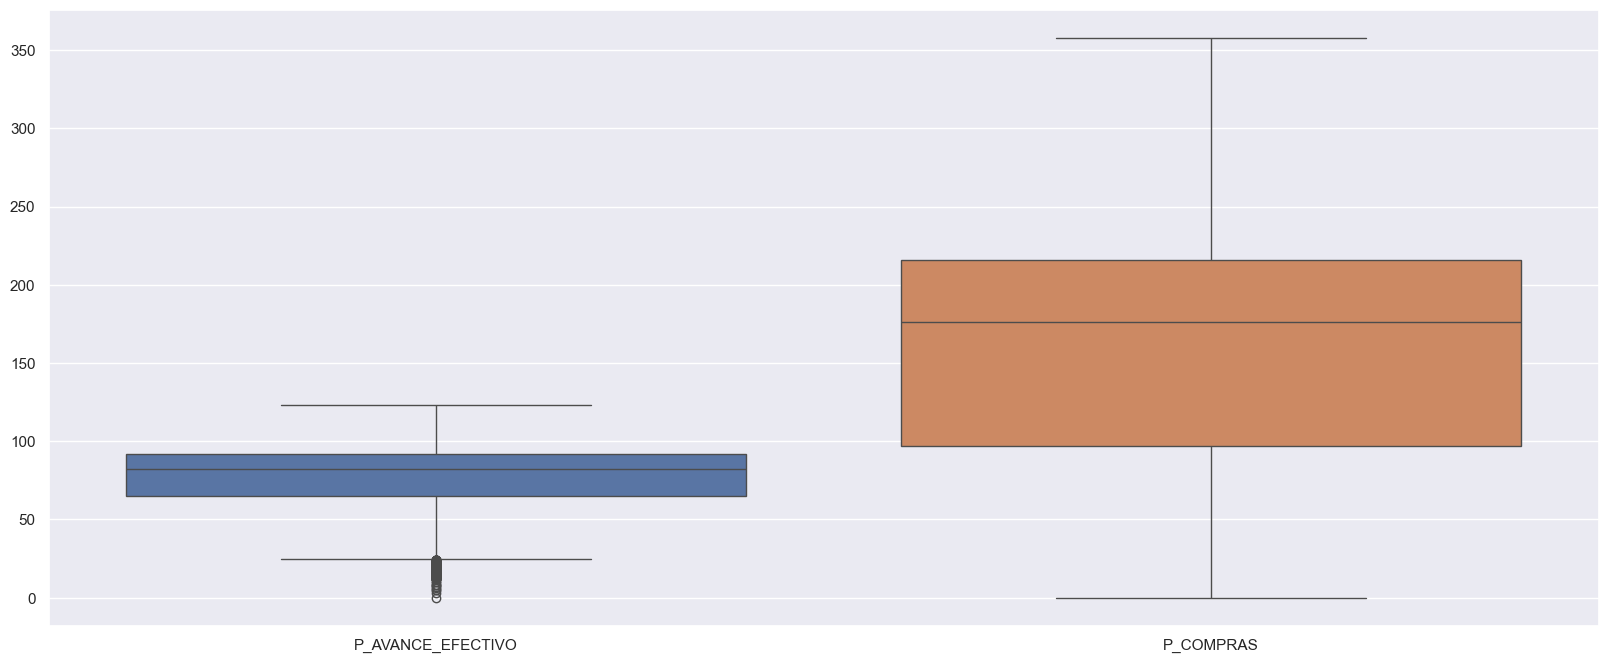

In [246]:
#Visualización de todas las variables numéricas
fig= plt.figure(figsize=(20,8))
ax = sns.boxplot(data=df_trabajo[a], orient="v")
plt.show()
fig= plt.figure(figsize=(20,8))
ax = sns.boxplot(data=df_trabajo[b], orient="v")
plt.show()
fig= plt.figure(figsize=(20,8))
ax = sns.boxplot(data=df_trabajo[c], orient="v")


<Axes: xlabel='MESES_CLIENTE'>

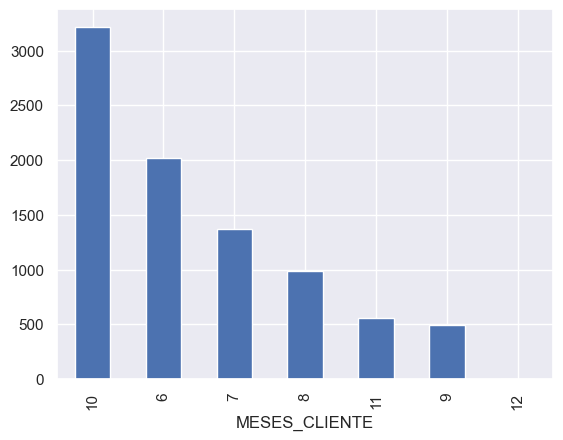

In [247]:
# Cómo se ven los meses
df_trabajo['MESES_CLIENTE'].value_counts().plot(kind='bar')

### Duplicados
Se revisa si existen duplicados en los datos

In [248]:
df_trabajo.duplicated().sum()

0

In [249]:
df_trabajo.duplicated(subset=['ID']).sum()

0

In [250]:
df_trabajo

,ID,SALDO,F_SALDO,COMPRAS,COMPRAS_PUNTUALES,COMPRAS_PLAZOS,AVANCE_EFECTIVO,F_COMPRAS,F_COMPRAS_PUNTUALES,F_COMPRAS_PLAZOS,F_AVANCE_EFECTIVO,P_AVANCE_EFECTIVO,P_COMPRAS,LÍMITE_CREDITO,PAGOS,PAGOS_MINIMOS,F_PAGOS_COMPLETOS,MESES_CLIENTE
0,C10001,5323.148883,0.250693,26344.072200,38237.442520,3727.113162,15708.239680,0.496536,0.464442,0.821611,0.194502,100,77,16819.480040,21337.027460,39452.95812,0.817907,7
1,C10002,12726.638120,0.791307,37958.519020,5690.742440,18733.810960,38284.354430,0.699457,0.250327,0.654863,1.000000,78,156,15617.570580,8000.183624,63013.74848,0.343119,9
3,C10004,4740.988511,0.178076,27399.003840,38246.863490,3402.853375,6936.812518,0.439666,0.606597,0.783129,0.228299,78,83,12926.587970,23919.113400,38444.21998,0.883984,7
4,C10005,13820.920640,0.826914,42214.021630,7341.007821,19273.070990,40091.347850,0.821412,0.283579,0.501361,1.000000,88,182,14404.705070,6994.688474,62041.61734,0.383186,10
5,C10006,12439.064890,0.706673,40674.226120,6156.208831,19401.475610,32438.912700,0.836764,0.343936,0.527813,0.970693,103,216,14554.911550,8814.239865,58227.56469,0.398377,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C18946,6095.221156,0.234346,27094.007820,35917.204380,3463.821376,11711.578890,0.469832,0.539477,0.828321,0.191030,75,101,17623.810280,23954.396950,34841.82989,0.866856,7
8946,C18947,12682.575820,0.686025,38433.618850,5293.541956,18924.799800,34444.867320,0.710331,0.276426,0.546059,0.935152,95,170,12433.814930,7375.625322,66726.37299,0.306600,10
8947,C18948,16464.311410,0.189136,4296.196384,32554.759640,11231.500430,15214.671560,0.424665,0.746010,0.690380,1.000000,51,151,3307.587117,22947.759220,54761.96221,0.129242,8
8948,C18949,15531.883780,0.117118,12219.325650,31795.971700,12390.432130,13856.393210,0.450670,0.805140,0.608737,1.000000,61,178,6148.232910,21369.503520,50368.30906,0.087448,8


No se encuentran duplicados

# Algoritmo 1 - KMeans

Algoritmo de Jhoan Sebastian Sánchez - 202215911

In [251]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

Debido a que KMeans calcula distancias para agrupar los datos, para evitar que las unidades de mayor magnitud tengan más fuerza sobre el algoritmo se estandarizo con MinMaxScaler el cual transforma el valor maximo en esa columna en 1 y el valor minimo en 0.

In [252]:
df_kmeans = df_trabajo.copy(True)
df_kmeans = df_kmeans.drop('ID', axis=1)
scaler = MinMaxScaler(feature_range=(0,1))
df_kmeans_s = df_kmeans.copy(True)
scaling = scaler.fit_transform(df_kmeans_s)
df_kmeans_s = pd.DataFrame(scaling, columns=df_kmeans.columns)
df_kmeans_s

,SALDO,F_SALDO,COMPRAS,COMPRAS_PUNTUALES,COMPRAS_PLAZOS,AVANCE_EFECTIVO,F_COMPRAS,F_COMPRAS_PUNTUALES,F_COMPRAS_PLAZOS,F_AVANCE_EFECTIVO,P_AVANCE_EFECTIVO,P_COMPRAS,LÍMITE_CREDITO,PAGOS,PAGOS_MINIMOS,F_PAGOS_COMPLETOS,MESES_CLIENTE
0,0.279531,0.250693,0.537200,0.936660,0.165649,0.333245,0.496536,0.447133,0.821611,0.194502,0.813008,0.215084,0.559916,0.420670,0.509905,0.817907,0.166667
1,0.668306,0.791307,0.774039,0.119829,0.832614,0.812190,0.699457,0.226097,0.654863,1.000000,0.634146,0.435754,0.519785,0.157728,0.822382,0.343119,0.500000
2,0.248960,0.178076,0.558712,0.936896,0.151238,0.147162,0.439666,0.593883,0.783129,0.228299,0.634146,0.231844,0.429936,0.471578,0.496526,0.883984,0.166667
3,0.725769,0.826914,0.860815,0.161246,0.856581,0.850524,0.821412,0.260424,0.501361,1.000000,0.715447,0.508380,0.479289,0.137904,0.809489,0.383186,0.666667
4,0.653205,0.706673,0.829416,0.131511,0.862288,0.688181,0.836764,0.322732,0.527813,0.970693,0.837398,0.603352,0.484304,0.173777,0.758904,0.398377,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8631,0.320074,0.234346,0.552493,0.878428,0.153948,0.248457,0.469832,0.524592,0.828321,0.191030,0.609756,0.282123,0.586772,0.472273,0.448749,0.866856,0.166667
8632,0.665992,0.686025,0.783727,0.109861,0.841102,0.730736,0.710331,0.253040,0.546059,0.935152,0.772358,0.474860,0.413483,0.145414,0.871620,0.306600,0.666667
8633,0.864580,0.189136,0.087607,0.794040,0.499178,0.322774,0.424665,0.737801,0.690380,1.000000,0.414634,0.421788,0.108768,0.452427,0.712942,0.129242,0.333333
8634,0.815616,0.117118,0.249173,0.774997,0.550686,0.293959,0.450670,0.798842,0.608737,1.000000,0.495935,0.497207,0.203614,0.421311,0.654670,0.087448,0.333333


Ya con los datos escalados lo ideal seria calcular los hiperparametros de numero de cluster y la inicializacion del KMeans. Para calcular el cluster usaremos el metodo del codo y para la inicializacion se usara k-means++ en lugar de random ya que este es más estable.

In [253]:
def plot_distortion(data,
                    k_min=1, 
                    k_max=11,
                    ylabel = 'Distortion',
                    xlabel = 'Number of clusters',
                    title = 'Distortion Plot'):
    '''
    Graficar el codo de los clusters
    
    Parametros
    ----------
    data : np.array
        El arreglo con los datos
    k_min : int
        Valor mínimo para k
    k_max : int
        Valor máximo para k
    xlabel : string
        La etiqueta del eje x
    ylabel  string
        La etiqueta del eje y    
    title : string
        El titulo de la gráfica  
    '''
    distortions = []
    for i in range(k_min, k_max):
        km = KMeans(n_clusters=i,
                 init='k-means++',
                 n_init=10,
                 max_iter=300,
                 random_state=0)
        km.fit(data)
        distortions.append(km.inertia_)
    plt.plot(range(k_min,k_max), distortions, marker='o')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

El codo nos indica que el número de clusters más optimo es de 4

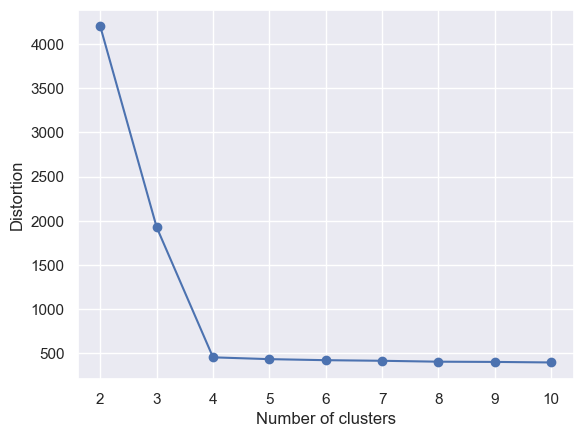

In [254]:
plot_distortion(df_kmeans_s, 2, 11)

In [255]:
def plot_silhouette(data, 
                    labels,
                   ylabel = 'Grupos',
                   xlabel = "Coeficiente de silueta",
                   title = 'Gráfica de silueta'):
    '''
    Graficar la silueta de los clusters
    
    Parametros
    ----------
    data : np.array
        El arreglo con los datos
    labels : np.array
        El arreglo con las etiquetas correspondientes
    ylabel  string
        La etiqueta del eje y
    xlabel : string
        La etiqueta del eje x
    title : string
        El titulo de la gráfica        
    '''
    cluster_labels = np.unique(labels)
    print(cluster_labels)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(data,
                                        labels,
                                        metric='euclidean')
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[labels == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        plt.barh(range(y_ax_lower, y_ax_upper),
                        c_silhouette_vals,
                        height=1.0,
                        edgecolor='none',
                        color=color)
        yticks.append((y_ax_lower + y_ax_upper) / 2.)
        y_ax_lower += len(c_silhouette_vals)
    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg,
                color="red",
                linestyle="--")
    plt.yticks(yticks, cluster_labels+1)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)
    plt.show()

Se ejecutan el KMeans sobre los datos escalados, pero las etiquetas se ponen sobre los datos sin escalar para que sea más facil analizar las agrupaciones con los valores entregados por el negocio

<Axes: xlabel='Cluster'>

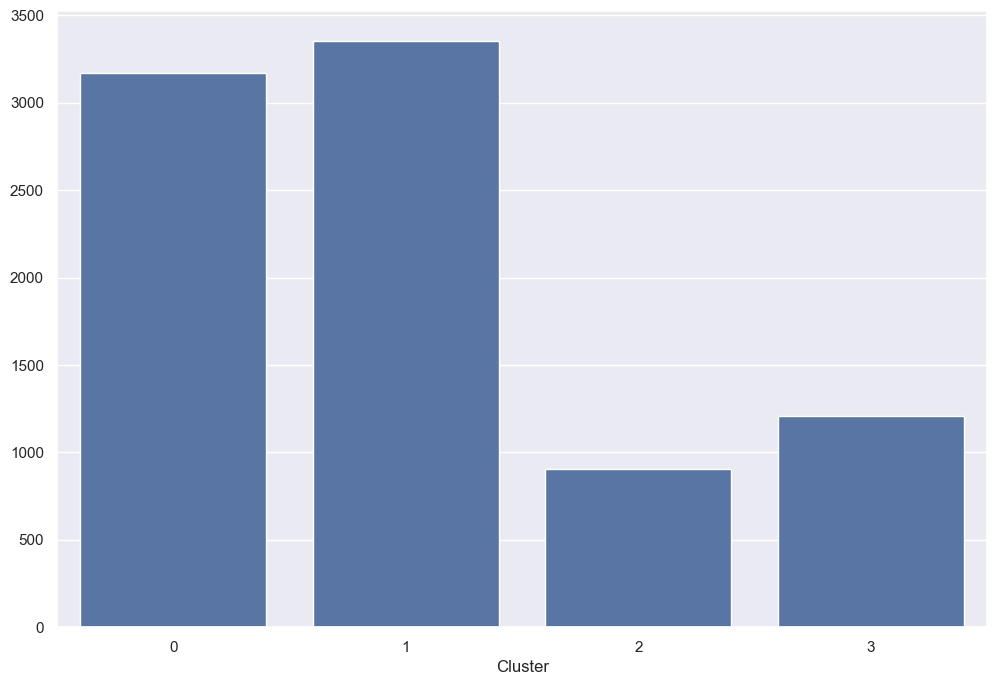

In [256]:
km = KMeans(n_clusters=4, init='k-means++',n_init=10, max_iter=300,random_state=0)
res_kmeans = km.fit(df_kmeans_s)
labels = res_kmeans.labels_
df_kmeans['Cluster'] = labels

cluster_distrib = df_kmeans['Cluster'].value_counts()

fig=plt.figure(figsize=(12,8))
sns.barplot(x=cluster_distrib.index, y=cluster_distrib.values, color='b')

[0 1 2 3]


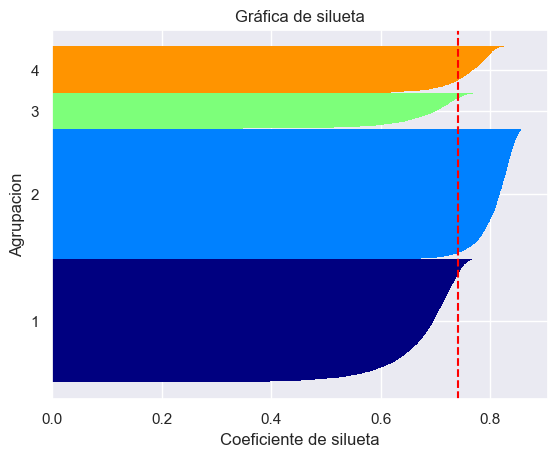

In [257]:
plot_silhouette(data = df_kmeans, 
                labels = res_kmeans.labels_, 
                ylabel = 'Agrupacion')

In [259]:
kmean_labels=labels
sil_score = silhouette_score(df_kmeans_s, labels)
print(f"Silhouette Score: {sil_score}")
db_index = metrics.davies_bouldin_score(df_kmeans_s, labels)
ch_index = metrics.calinski_harabasz_score(df_kmeans_s, labels)
print(f"Davies-Bouldin Index: {db_index:.2f}") # similitud promedio entre un cluster y otro , se quiere un 0
print(f"Calinski-Harabasz Index: {ch_index:.2f}") # diferencias entre grupos entre mayor mejor

Silhouette Score: 0.7943195883123193
Davies-Bouldin Index: 0.29
Calinski-Harabasz Index: 58543.56


# Algoritmo 2 - DBSCAN
 Implementado por Juan Diego Sánchez 202214625

## Explicación del algoritmo:

1. Se elije un $\epsilon$ (eps) que indica la máxima distancia entre 2 puntos para ser considerados partes del mismo cluster, y un min_samples que es el minimo número de puntos que se necesitan para ser considerado un core point en el cluster.

2. Se encuentran los core points de los cluster observando los que tienen más puntos a una distancia $\epsilon$.

3. Se asigna al cluster del punto $\epsilon$ más cercano, si no tiene ninguno se asigna al ruido (cluster -1).

Fuente: https://en.wikipedia.org/wiki/DBSCAN


In [206]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler
import numpy as np

Se copia el df y se elimina la columna ID ya que no aporta en la creación de clusters. En el caso de la columna MESES_CLIENTE no tiene sentido nomalizarla, y el uso de distancia cartesiana genera complicaciones para el número de meses.

In [207]:
df_dbscan = df_trabajo.copy(True)
df_dbscan= df_dbscan.drop(['ID'], axis=1)
df_dbscan.describe()

,SALDO,F_SALDO,COMPRAS,COMPRAS_PUNTUALES,COMPRAS_PLAZOS,AVANCE_EFECTIVO,F_COMPRAS,F_COMPRAS_PUNTUALES,F_COMPRAS_PLAZOS,F_AVANCE_EFECTIVO,P_AVANCE_EFECTIVO,P_COMPRAS,LÍMITE_CREDITO,PAGOS,PAGOS_MINIMOS,F_PAGOS_COMPLETOS,MESES_CLIENTE
count,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000
mean,9383.315225,0.458869,30506.644432,22919.437163,11402.867473,22572.448971,0.559650,0.478428,0.624101,0.690454,76.166975,164.886174,14690.792408,19819.133774,44224.411642,0.545337,8.369152
std,5120.278788,0.282995,11043.384680,13567.922117,7086.859792,12588.448346,0.213905,0.221663,0.208025,0.376051,22.237366,71.263041,5526.888941,11064.989216,15468.635869,0.267686,1.755631
min,0.000000,0.000000,0.000000,916.121374,0.000000,0.000000,0.000000,0.031308,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,1006.064965,0.000000,6.000000
25%,4274.662323,0.188398,27104.936342,6700.821865,3737.123061,10953.982467,0.407487,0.251875,0.518437,0.230676,65.000000,97.000000,13485.387555,9321.637941,31571.869243,0.336445,7.000000
50%,12012.129670,0.305396,30920.065455,31014.788550,10826.957970,19471.666280,0.504715,0.533603,0.607608,0.947896,82.000000,176.000000,14945.262580,21364.638450,48786.419665,0.432607,8.000000
75%,13743.718880,0.756067,39808.933265,34490.217572,19131.456735,36151.178305,0.777007,0.648637,0.814979,1.000000,92.000000,216.000000,16263.164765,25212.785518,57761.830637,0.815615,10.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.000000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


### Normalización
Se normaliza para poder hacer los datos equiparables entre ellos. Esto se debe a quecomo se observa en la celda anterior hay algunos datos con valor máximo 1 y otras con valores muchísimo mayores.

En un inicio se realizó una normalización dividiendo todos los datos por el máximo de su columna. No obstante, luego se decidió usar el Scaler de sklearn. No se obtuvieron muchas diferencias.

In [208]:
# # se normalizan las variables del 0 al 1
# for i in df_dbscan.columns:
#     maximo=max(df_dbscan[i])
#     df_dbscan[i] = df_dbscan[i].apply(lambda x: x/maximo)

scales_dbscan = MinMaxScaler(feature_range=(0,1))
scales_dbscan = scales_dbscan.fit(df_dbscan)
scales_dbscan = scales_dbscan.transform(df_dbscan)


In [209]:
df_dbscan_model = pd.DataFrame(scales_dbscan, columns=df_dbscan.columns)

### Selección de columnas

Se elijieron todas las columnas ofrecidas por los datos obtenidos y limpiados al inicio del notebook a excepción del ID ya que se consideró que todas las características aportaban algo valioso para la selección de los clusters. MESES_CLIENTE fué eliminada debido a que no tiene sentido normalizarla para poder utilizarla aquí.

In [210]:
df_dbscan_model.describe()

,SALDO,F_SALDO,COMPRAS,COMPRAS_PUNTUALES,COMPRAS_PLAZOS,AVANCE_EFECTIVO,F_COMPRAS,F_COMPRAS_PUNTUALES,F_COMPRAS_PLAZOS,F_AVANCE_EFECTIVO,P_AVANCE_EFECTIVO,P_COMPRAS,LÍMITE_CREDITO,PAGOS,PAGOS_MINIMOS,F_PAGOS_COMPLETOS,MESES_CLIENTE
count,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000
mean,0.492740,0.458869,0.622082,0.552221,0.506794,0.478867,0.559650,0.461570,0.624101,0.690454,0.619244,0.460576,0.488841,0.390744,0.573187,0.545337,0.394859
std,0.268878,0.282995,0.225193,0.340516,0.314972,0.267060,0.213905,0.228827,0.208025,0.376051,0.180792,0.199059,0.184537,0.218152,0.205154,0.267686,0.292605
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.224473,0.188398,0.552716,0.145180,0.166094,0.232385,0.407487,0.227696,0.518437,0.230676,0.528455,0.270950,0.448594,0.183781,0.405381,0.336445,0.166667
50%,0.630785,0.305396,0.630513,0.755391,0.481198,0.413085,0.504715,0.518529,0.607608,0.947896,0.666667,0.491620,0.497338,0.421215,0.633691,0.432607,0.333333
75%,0.721715,0.756067,0.811772,0.842615,0.850287,0.766935,0.777007,0.637281,0.814979,1.000000,0.747967,0.603352,0.541341,0.497083,0.752728,0.815615,0.666667
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


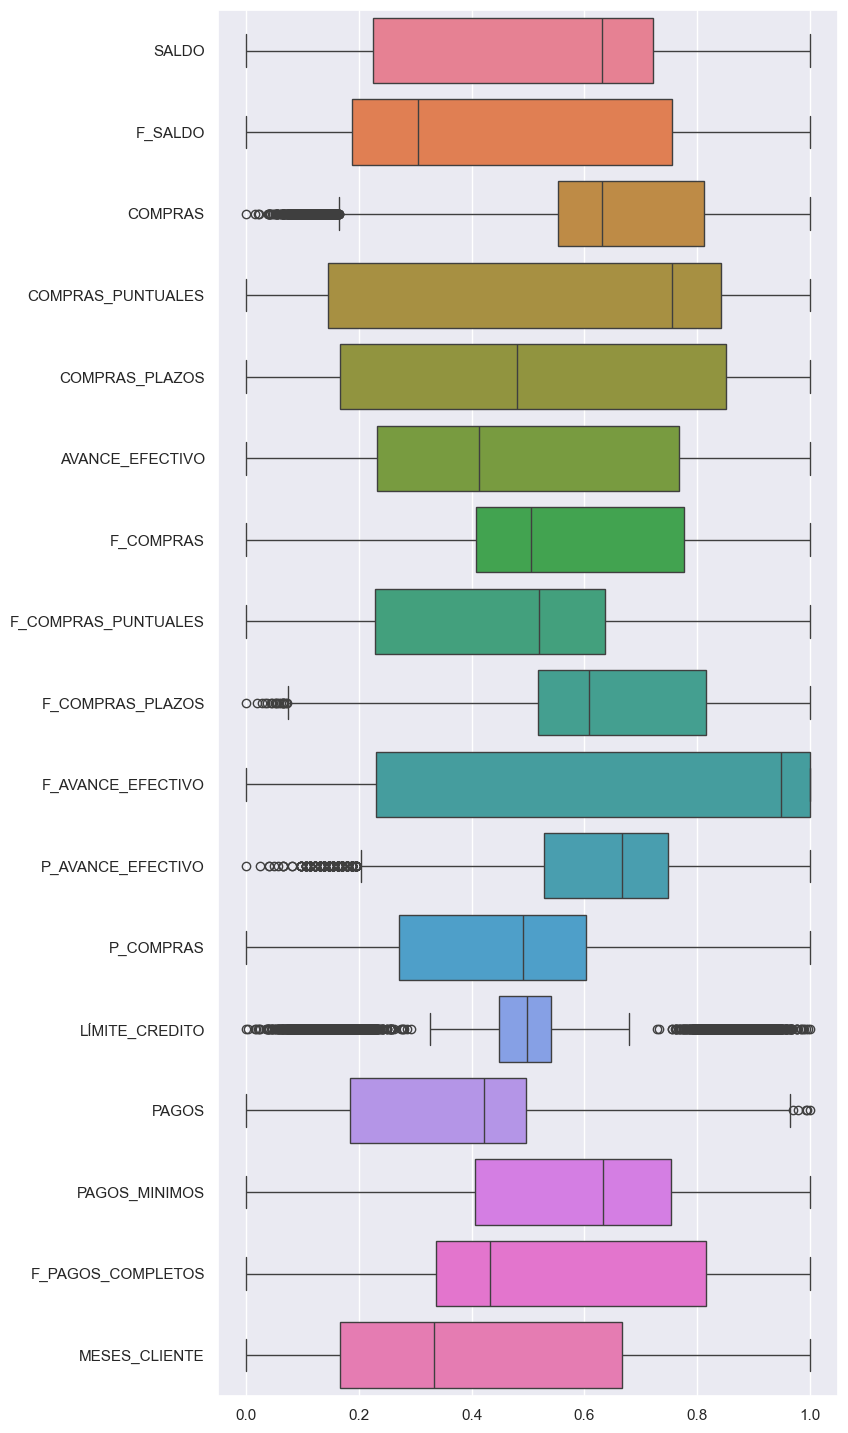

In [211]:
#Visualización de todas las variables numéricas
fig= plt.figure(figsize=(8,18))
ax = sns.boxplot(data=df_dbscan_model, orient="h")
plt.show()


In [212]:
df_dbscan_uso_model =df_dbscan_model.drop(['MESES_CLIENTE'], axis=1)

## *Modelo*

Se utilizaron los hiperparámetros por defecto, $min\_space = 5$ y $\epsilon = 0.5$. Esto debido a que en otras pruebas se encontraron los mismos 4 cluster y practicamente ningún cambio en las métricas. Además, el epsilon tiene sentido debido a que los datos están normalizados de 0 a 1.

In [213]:
dbscan_model = DBSCAN()
dbscan_model.fit(df_dbscan_uso_model)

DBSCAN()

In [214]:
dbscan_result = dbscan_model.fit_predict(df_dbscan_uso_model)
dbscan_clusters = np.unique(dbscan_result)
df_dbscan_model['resultados']=dbscan_result

### Resultados

In [215]:
dbscan_clusters

array([0, 1, 2, 3], dtype=int64)

<Axes: title={'center': 'Número de elementos por cluster'}, xlabel='Cluster', ylabel='Número de elementos'>

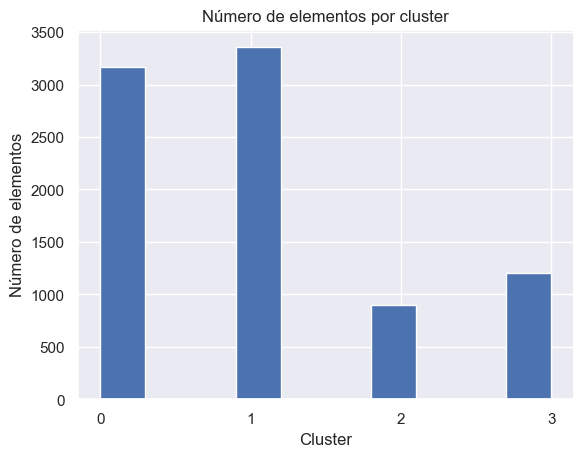

In [216]:
pd.Series(dbscan_result).plot(kind='hist', title='Número de elementos por cluster', xlabel='Cluster', ylabel='Número de elementos', xticks=dbscan_clusters)

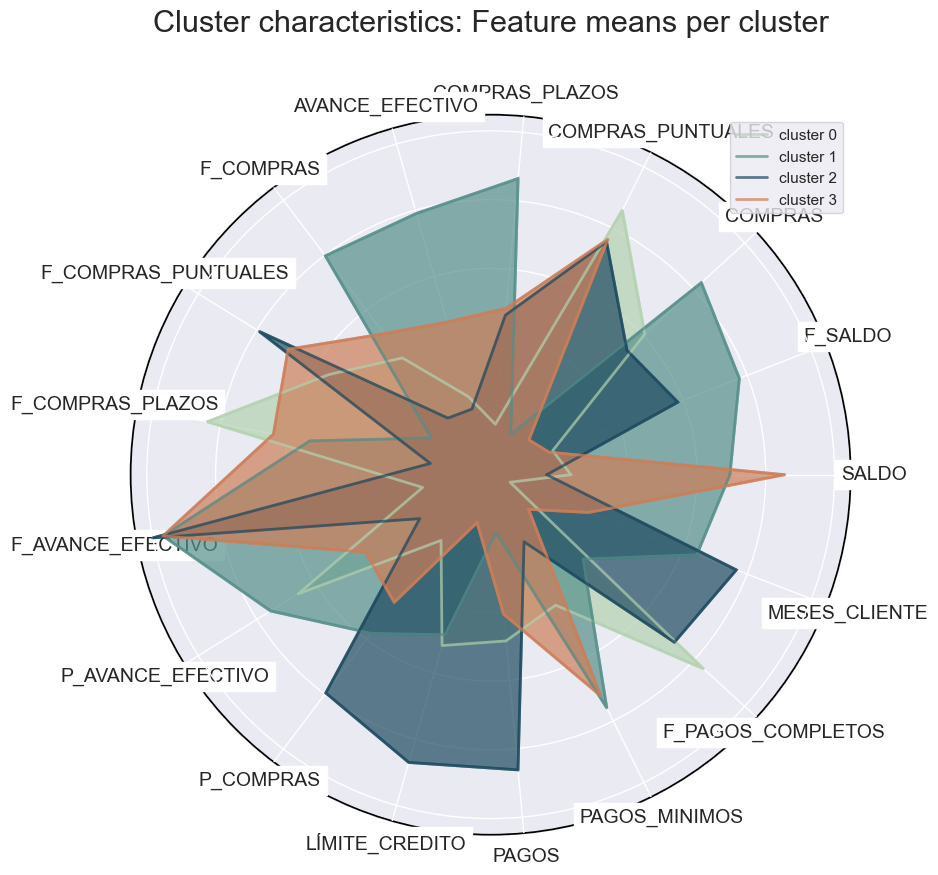

In [217]:
class Radar(object):
    def __init__(self, figure, title, labels, rect=None):
        if rect is None:
            rect = [0.05, 0.05, 0.9, 0.9]

        self.n = len(title)
        self.angles = np.arange(0, 360, 360.0/self.n)
        
        self.axes = [figure.add_axes(rect, projection='polar', label='axes%d' % i) for i in range(self.n)]
        self.ax = self.axes[0]
        self.ax.set_thetagrids(self.angles, labels=title, fontsize=14, backgroundcolor="white",zorder=999) # Feature names
        self.ax.set_yticklabels([])
        
        for ax in self.axes[1:]:
            ax.xaxis.set_visible(False)
            ax.set_yticklabels([])
            ax.set_zorder(-99)

        for ax, angle, label in zip(self.axes, self.angles, labels):
            ax.spines['polar'].set_color('black')
            ax.spines['polar'].set_zorder(-99)
                     
    def plot(self, values, *args, **kw):
        angle = np.deg2rad(np.r_[self.angles, self.angles[0]])
        values = np.r_[values, values[0]]
        self.ax.plot(angle, values, *args, **kw)
        kw['label'] = '_noLabel'
        self.ax.fill(angle, values,*args,**kw)
feature_names=df_dbscan_model.columns.drop('resultados')
fig = plt.figure(figsize=(8, 8))
no_features = len(feature_names)
radar = Radar(fig,feature_names, np.unique(df_dbscan_model.resultados))
cluster_colors = ['#b4d2b1', '#568f8b', '#1d4a60', '#cd7e59', '#ddb247', '#d15252']

X_std_mean = pd.concat([pd.DataFrame(df_dbscan_model.mean().drop('resultados'), columns=['mean']), 
                   df_dbscan_model.groupby('resultados').mean().T], axis=1)

for k in range(0,len(np.unique(df_dbscan_model.resultados))):
    cluster_data = X_std_mean[k].values.tolist()
    radar.plot(cluster_data,  '-', lw=2, color=cluster_colors[k], alpha=0.7, label='cluster {}'.format(k))

radar.ax.legend()
radar.ax.set_title("Cluster characteristics: Feature means per cluster", size=22, pad=60)
plt.show()


[0 1 2 3]


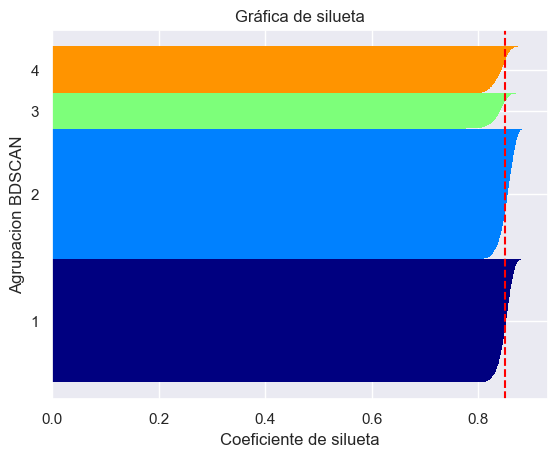

In [218]:
plot_silhouette(data = df_dbscan_model, 
                labels = df_dbscan_model.resultados, 
                ylabel = 'Agrupacion BDSCAN')

In [219]:
sil_score = silhouette_score(df_dbscan_model, dbscan_result)
print(f"Silhouette Score: {sil_score}")
db_index = metrics.davies_bouldin_score(df_dbscan_model, dbscan_result)
ch_index = metrics.calinski_harabasz_score(df_dbscan_model, dbscan_result)
print(f"Davies-Bouldin Index: {db_index:.2f}") # similitud promedio entre un cluster y otro , se quiere un 0
print(f"Calinski-Harabasz Index: {ch_index:.2f}") # diferencias entre grupos entre mayor mejor


Silhouette Score: 0.8499820159219438
Davies-Bouldin Index: 0.22
Calinski-Harabasz Index: 114752.90


Se observa que los clusters encontrados se pueden describir así:

En el cluster 0 encontramos a las personas que tienen mayor número de compras puntuales, frecuencia de compras a plazos, pagos completos

En el cluster 1 encontramos a los clientes que gastan más en compras, actualizan el saldo regularmente, se caracterízan por hacer avances en efectivo de grandes cantidades, compras a plazo.

En el cluster 2  encontramos a los que tienen un mayor límite de crédito, una mayor cantidad de dinero en pagos, realizan más compras puntuales, generalmente no tienen tanto saldo y realizan compras puntuales en mayor medida.

En el cluster 3 encontramos al un sector que se caracteriza por hacer muchos avances en efectivo de montos menores, realizan muchos pagos minimos y manejan el saldo más alto, además realizan muchas compras puntuales.

# Algoritmo 3 - Affinity Propagation

Implementado por Pablo Méndez 202210379

## Explicación del algoritmo:
Affinity propagation es un algoritmo de clustering que se basa en el concepto de "messaging" entre puntos de datos. Este algortimo busca puntos que se puedan considerar como ejemplares de los grupos.<br>
Algo que separa a este algoritmo de K-means es que no busca un número de conjuntos especificado por el parametro, el algoritmo "decide" la cantidad de grupos según el conjunto de datos de entrada. 

In [179]:
from sklearn.cluster import AffinityPropagation

In [182]:
df_affinity = df_trabajo.copy(True)
df_affinity

,SALDO,F_SALDO,COMPRAS,COMPRAS_PUNTUALES,COMPRAS_PLAZOS,AVANCE_EFECTIVO,F_COMPRAS,F_COMPRAS_PUNTUALES,F_COMPRAS_PLAZOS,F_AVANCE_EFECTIVO,P_AVANCE_EFECTIVO,P_COMPRAS,LÍMITE_CREDITO,PAGOS,PAGOS_MINIMOS,F_PAGOS_COMPLETOS,MESES_CLIENTE
0,5323.148883,0.250693,26344.072200,38237.442520,3727.113162,15708.239680,0.496536,0.464442,0.821611,0.194502,100,77,16819.480040,21337.027460,39452.95812,0.817907,7
1,12726.638120,0.791307,37958.519020,5690.742440,18733.810960,38284.354430,0.699457,0.250327,0.654863,1.083902,78,156,15617.570580,8000.183624,63013.74848,0.343119,9
3,4740.988511,0.178076,27399.003840,38246.863490,3402.853375,6936.812518,0.439666,0.606597,0.783129,0.228299,78,83,12926.587970,23919.113400,38444.21998,0.883984,7
4,13820.920640,0.826914,42214.021630,7341.007821,19273.070990,40091.347850,0.821412,0.283579,0.501361,1.106350,88,182,14404.705070,6994.688474,62041.61734,0.383186,10
5,12439.064890,0.706673,40674.226120,6156.208831,19401.475610,32438.912700,0.836764,0.343936,0.527813,0.970693,103,216,14554.911550,8814.239865,58227.56469,0.398377,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,6095.221156,0.234346,27094.007820,35917.204380,3463.821376,11711.578890,0.469832,0.539477,0.828321,0.191030,75,101,17623.810280,23954.396950,34841.82989,0.866856,7
8946,12682.575820,0.686025,38433.618850,5293.541956,18924.799800,34444.867320,0.710331,0.276426,0.546059,0.935152,95,170,12433.814930,7375.625322,66726.37299,0.306600,10
8947,16464.311410,0.189136,4296.196384,32554.759640,11231.500430,15214.671560,0.424665,0.746010,0.690380,1.063788,51,151,3307.587117,22947.759220,54761.96221,0.129242,8
8948,15531.883780,0.117118,12219.325650,31795.971700,12390.432130,13856.393210,0.450670,0.805140,0.608737,1.058548,61,178,6148.232910,21369.503520,50368.30906,0.087448,8


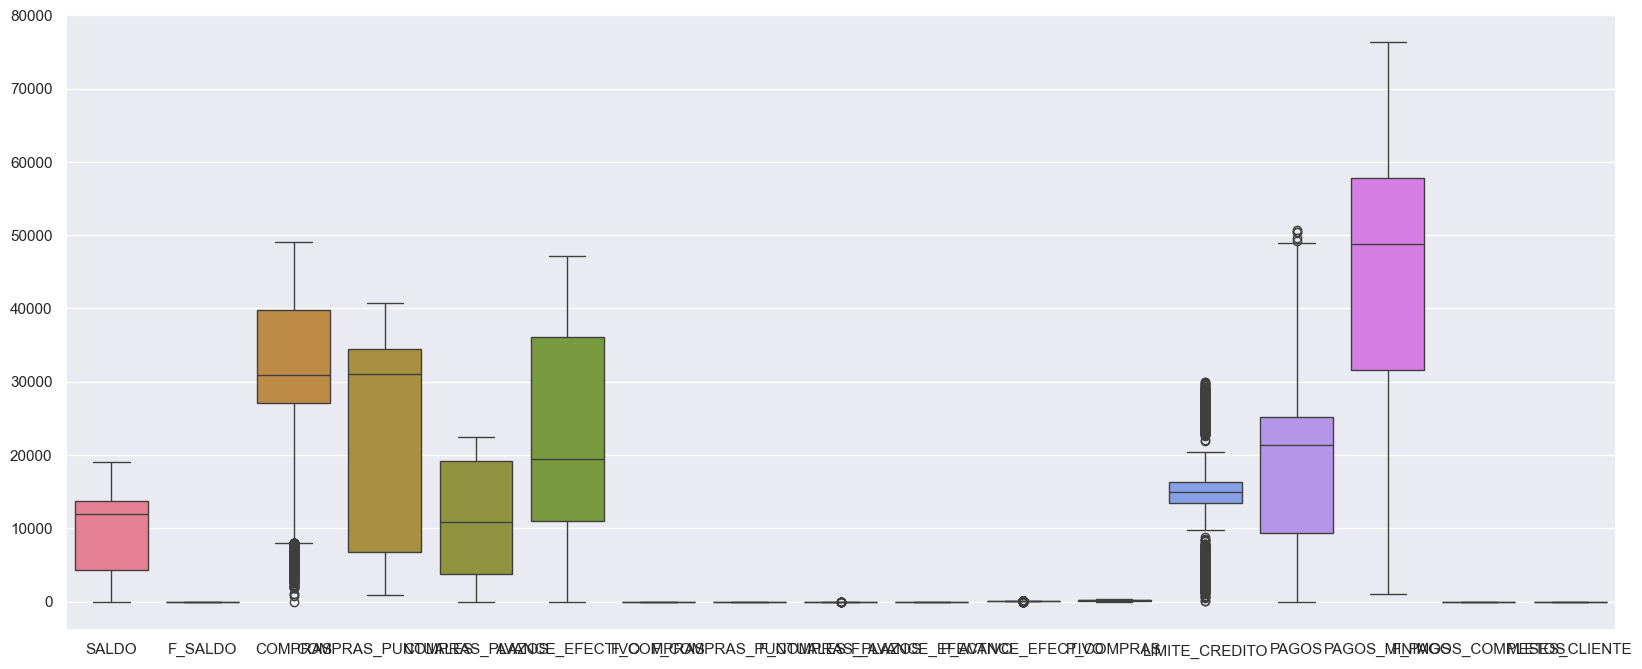

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
ax = sns.boxplot(data=df_affinity, orient="v")#Diagrama de bigotes

Se identifian outliers en las columnas de "Compras" y de "LÍMITE_CREDITO", con el objetivo de mejorar el modelo se busca eliminarlos.

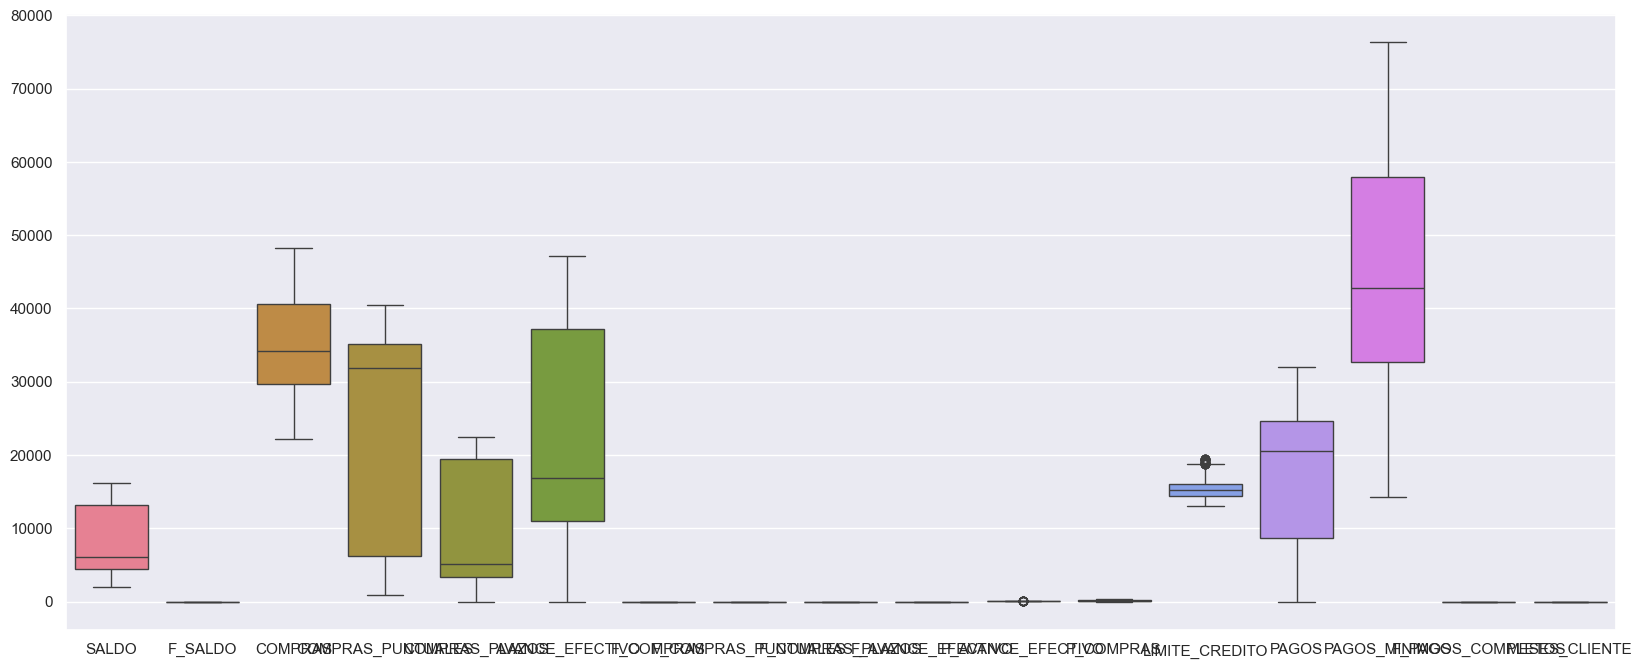

In [ ]:
#Eliminar Outliers
compras_q1=df_affinity["COMPRAS"].quantile(0.25)
compras_q3=df_affinity["COMPRAS"].quantile(0.75)
compras_iqr=compras_q3-compras_q1

compras_threshold_max = compras_q3 +1.5*compras_iqr
compras_threshold_min = compras_q3 -1.5*compras_iqr

df_affinity = df_affinity.loc[df_affinity["COMPRAS"] <= compras_threshold_max]
df_affinity = df_affinity.loc[df_affinity["COMPRAS"] >= compras_threshold_min]


LCredito_q1=df_affinity["LÍMITE_CREDITO"].quantile(0.25)
LCredito_q3=df_affinity["LÍMITE_CREDITO"].quantile(0.75)
LCredito_iqr=LCredito_q3-LCredito_q1

LCredito_threshold_max = LCredito_q3 +1.5*LCredito_iqr
LCredito_threshold_min = LCredito_q3 -1.5*LCredito_iqr

df_affinity = df_affinity.loc[df_affinity["LÍMITE_CREDITO"] <= LCredito_threshold_max]
df_affinity = df_affinity.loc[df_affinity["LÍMITE_CREDITO"] >= LCredito_threshold_min]

fig, ax = plt.subplots(figsize=(20,8))
ax = sns.boxplot(data=df_affinity, orient="v")#Diagrama de bigotes
#LCredito_q1=df_affinity["LÍMITE_CREDITO"]

Como se puede ver se eliminaron los oultiers correctamente.

In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# 
# df_affinity=df_affinity[seleccion]
# affinity_scaler=MinMaxScaler((0,1))#Normalizar
# df_affinity=affinity_scaler.fit_transform(df_affinity)#training set

af = AffinityPropagation(random_state=0,damping=0.8).fit(df_affinity)
af

AffinityPropagation(damping=0.8, random_state=0)

Se ejecuta el algoritmo: se intento normalizar los datos; sin embargo, no dio resultados positivos. Solo empeoro el modelo.<br>
Tambien se modifico el valor del $damping$ y se encontro que 0.8 era adecuado, un buen valor.

In [ ]:
df_affinity

,SALDO,F_SALDO,COMPRAS,COMPRAS_PUNTUALES,COMPRAS_PLAZOS,AVANCE_EFECTIVO,F_COMPRAS,F_COMPRAS_PUNTUALES,F_COMPRAS_PLAZOS,F_AVANCE_EFECTIVO,P_AVANCE_EFECTIVO,P_COMPRAS,LÍMITE_CREDITO,PAGOS,PAGOS_MINIMOS,F_PAGOS_COMPLETOS,MESES_CLIENTE
0,5323.148883,0.250693,26344.07220,38237.442520,3727.113162,15708.239680,0.496536,0.464442,0.821611,0.194502,100,77,16819.48004,21337.027460,39452.95812,0.817907,7
1,12726.638120,0.791307,37958.51902,5690.742440,18733.810960,38284.354430,0.699457,0.250327,0.654863,1.000000,78,156,15617.57058,8000.183624,63013.74848,0.343119,9
4,13820.920640,0.826914,42214.02163,7341.007821,19273.070990,40091.347850,0.821412,0.283579,0.501361,1.000000,88,182,14404.70507,6994.688474,62041.61734,0.383186,10
5,12439.064890,0.706673,40674.22612,6156.208831,19401.475610,32438.912700,0.836764,0.343936,0.527813,0.970693,103,216,14554.91155,8814.239865,58227.56469,0.398377,10
6,5751.875116,0.202635,32509.15916,34929.992110,2951.501163,15831.777600,0.433735,0.572119,0.848748,0.257982,80,99,16427.99721,26477.357790,19768.61317,0.919282,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8939,14285.569850,0.822216,40170.38629,6472.835431,19346.210720,36202.478670,0.862771,0.324091,0.597733,0.935620,101,227,14085.33118,8938.684376,60844.06023,0.486654,10
8941,13434.274470,0.758648,42511.20922,3679.376217,18827.429530,35136.779640,0.752240,0.256360,0.525504,1.000000,87,202,13975.07800,7020.073130,58548.04446,0.417750,10
8943,11658.261330,0.787877,40468.62379,5411.361875,18894.477550,40461.053900,0.970439,0.183322,0.500901,1.000000,96,145,14508.14238,4600.568825,56319.07507,0.342270,9
8945,6095.221156,0.234346,27094.00782,35917.204380,3463.821376,11711.578890,0.469832,0.539477,0.828321,0.191030,75,101,17623.81028,23954.396950,34841.82989,0.866856,7


Despues de ejecutarse el algoritmo, se procede a evaluar los diferentes resultados. Lo más interesante que el algoritmo identifica 47 (?!?!?) clusters. Este es un resultado sorprendente, se esperaban muchos menos.

In [ ]:
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_
n_clusters_ = len(cluster_centers_indices)

print(f"Num clusters: {n_clusters_}")
print(f"Cluster_centers: {cluster_centers_indices}")
print(f"Labels: {labels}")

Num clusters: 47
Cluster_centers: [   2   30   53   72  339  395 1180 1283 1361 1417 1476 1500 1572 1859
 1928 2014 2057 2089 2248 2255 2534 2612 3142 3245 3271 3327 3351 3374
 3534 3751 3773 4044 4048 4187 4258 4337 4438 4757 5009 5114 5160 5429
 5507 5757 5795 5893 5904]
Labels: [36 31  0 ... 34 27 29]


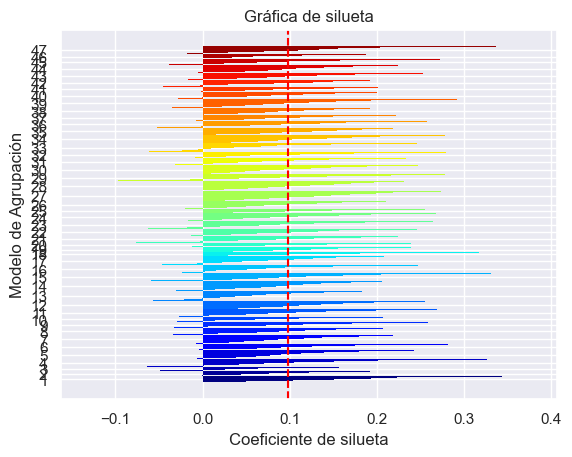

In [ ]:
#Función robada
def plot_silhouette(data, 
                    labels,
                   ylabel = 'Grupos',
                   xlabel = "Coeficiente de silueta",
                   title = 'Gráfica de silueta'):
    '''
    Graficar la silueta de los clusters
    
    Parametros
    ----------
    data : np.array
        El arreglo con los datos
    labels : np.array
        El arreglo con las etiquetas correspondientes
    ylabel  string
        La etiqueta del eje y
    xlabel : string
        La etiqueta del eje x
    title : string
        El titulo de la gráfica        
    '''
    cluster_labels = np.unique(labels)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(data,
                                        labels,
                                        metric='euclidean')
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[labels == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        plt.barh(range(y_ax_lower, y_ax_upper),
                        c_silhouette_vals,
                        height=1.0,
                        edgecolor='none',
                        color=color)
        yticks.append((y_ax_lower + y_ax_upper) / 2.)
        y_ax_lower += len(c_silhouette_vals)
    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg,
                color="red",
                linestyle="--")
    plt.yticks(yticks, cluster_labels+1)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)
    plt.show()
    
plot_silhouette(data = df_affinity, 
                labels = af.labels_, 
                ylabel = 'Modelo de Agrupación')
    

Como se puede ver en el diagrama de silueta, el modelo no es muy efectivo en la tarea de identificar clusters(algo que se puede evidenciar en el coeficiente de silueta que esta alrededor de 0.1).

In [ ]:
#df_affinity=pd.DataFrame(affinity_scaler.inverse_transform(df_affinity),columns=seleccion)
labels=af.labels_
df_affinity["cluster"] = labels
cluster_distribution = df_affinity["cluster"].value_counts()
cluster_distribution
df_affinity["cluster"]

#sns.pairplot(data=df_affinity,hue="cluster")#Barplot

#Se demora mucho en correr el pair plot y no brinda mucha información

0       36
1       31
4        0
5        9
6       24
        ..
8939     6
8941    32
8943    34
8945    27
8949    29
Name: cluster, Length: 5954, dtype: int64

In [ ]:

sil_score = silhouette_score(df_affinity, labels)
print(f"Silhouette Score: {sil_score}")
db_index = metrics.davies_bouldin_score(df_affinity, labels)
ch_index = metrics.calinski_harabasz_score(df_affinity, labels)
print(f"Davies-Bouldin Index: {db_index:.2f}") # similitud promedio entre un cluster y otro , se quiere un 0
print(f"Calinski-Harabasz Index: {ch_index:.2f}") # diferencias entre grupos entre mayor mejor

Silhouette Score: 0.0974828276944183
Davies-Bouldin Index: 1.81
Calinski-Harabasz Index: 6277.99


Creemos que el pobre resultado de este modelo se dio debido a que no esta diseñado para este tipo de problemas. Si, es un algoritmo de agrupación pero esta enfocado hacia documentos y textos; es de suponer que no trabaja bien en otras circusntancias. Es  por esto que los resultados son los peores (y por mucho) de los tres algoritmos implementados.

# Conclusiones

Para elegir la mejor implementación de algoritmo tendremos en cuenta 3 metricas:

*   Silhouette Score: Que mide que tan cercanos son los datos de un mismo cluster y que tan distintos son los clusters entre ellos, los resultados van desde -1 a 1, y entre más cercano a 1 mejor es el modelo.
* Davies-Bouldin Index: El cual mide la similitud promedio entre un cluster y otro, este indice es mejor entre más cercano a 0 es.
* Calinkski-Harabasz Index: Calcula la diferencia entre clusters y entre más grande mejor.

Las metricas de KMeans fueron:


In [260]:
sil_score = silhouette_score(df_kmeans_s, kmean_labels)
db_index = metrics.davies_bouldin_score(df_kmeans_s, kmean_labels)
ch_index = metrics.calinski_harabasz_score(df_kmeans_s, kmean_labels)
print(f"Silhouette Score: {sil_score}")
print(f"Davies-Bouldin Index: {db_index:.2f}")
print(f"Calinski-Harabasz Index: {ch_index:.2f}")

Silhouette Score: 0.7943195883123193
Davies-Bouldin Index: 0.29
Calinski-Harabasz Index: 58543.56


Las metricas de BDSCAN fueron:

In [261]:
sil_score = silhouette_score(df_dbscan_model, dbscan_result)
db_index = metrics.davies_bouldin_score(df_dbscan_model, dbscan_result)
ch_index = metrics.calinski_harabasz_score(df_dbscan_model, dbscan_result)
print(f"Silhouette Score: {sil_score}")
print(f"Davies-Bouldin Index: {db_index:.2f}")
print(f"Calinski-Harabasz Index: {ch_index:.2f}")


Silhouette Score: 0.8499820159219438
Davies-Bouldin Index: 0.22
Calinski-Harabasz Index: 114752.90


Las metricas de Affinity Propagation fueron:


In [263]:
sil_score = silhouette_score(df_affinity, af.labels_)
db_index = metrics.davies_bouldin_score(df_affinity, af.labels_)
ch_index = metrics.calinski_harabasz_score(df_affinity, af.labels_)
print(f"Silhouette Score: {sil_score}")
print(f"Davies-Bouldin Index: {db_index:.2f}")
print(f"Calinski-Harabasz Index: {ch_index:.2f}")

Silhouette Score: 0.0974828276944183
Davies-Bouldin Index: 1.81
Calinski-Harabasz Index: 6277.99



Analizando las metricas individualmente KMeans y BDSCAN tuvieron resultados satisfactorios obteniendo un silhouette score superior al 0.78 y 0.85 respectivamente, y las demás metricas dan razon a estos resultados, por otro lado, Affinity Propagation tuvo metricas no aceptables y por lo tanto no es una implementacion viable para el análisis del negocio.

La mejor implementacion y la recomendad es la implementacion de BDSCAN ya que tuvo las mejores metricas en los tres indicadores si lo comparamos con la otra implementacion aceptable que es la de KMeans.

# Analisis a partir de BDSCAN

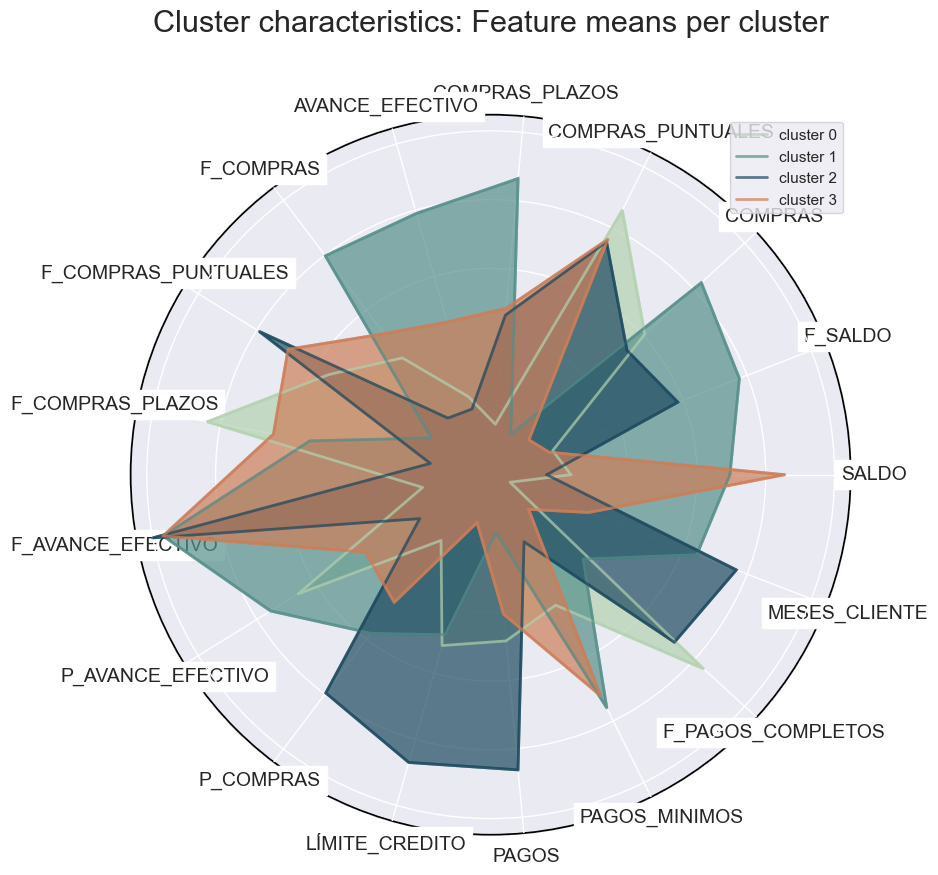

In [264]:
feature_names=df_dbscan_model.columns.drop('resultados')
fig = plt.figure(figsize=(8, 8))
no_features = len(feature_names)
radar = Radar(fig,feature_names, np.unique(df_dbscan_model.resultados))
cluster_colors = ['#b4d2b1', '#568f8b', '#1d4a60', '#cd7e59', '#ddb247', '#d15252']

X_std_mean = pd.concat([pd.DataFrame(df_dbscan_model.mean().drop('resultados'), columns=['mean']), 
                   df_dbscan_model.groupby('resultados').mean().T], axis=1)

for k in range(0,len(np.unique(df_dbscan_model.resultados))):
    cluster_data = X_std_mean[k].values.tolist()
    radar.plot(cluster_data,  '-', lw=2, color=cluster_colors[k], alpha=0.7, label='cluster {}'.format(k))

radar.ax.legend()
radar.ax.set_title("Cluster characteristics: Feature means per cluster", size=22, pad=60)
plt.show()


Esta grafica de radar fue generada con los resultados del BDSCAN, y genero 4 agrupaciones con los siguientes comportamientos:

* Cluster 0: Se caracterizan por ser los clientes con mayor cantidad de compras puntuales, la mayor frecuencia de compras a plazos y la mayor fecuencia de pagos completos. Tambien cuentan con una alta cantidad de compras realizadas en los ultimos 12 meses, un alto promedio de avances en efectivo, un mediano limite de credito y una mediana frecuencia de compras.

* Cluster 1: Se caracterizan por ser los clientes que compran con mayor frecuencia, que acumulan el mayor importe total de avances en efectivo, el mayor importe total de compras a plazos, el mayor importe total de compras realizadas en los últimos 12 meses, el mayor importe medio por operacion de avance en efectivo y el mayor total de pagos minimos. Ademas es uno de los grupos con clientes con mayor antiguedad. Aedemas es el grupo que menos importe total pagado para reducir el saldo de sus extracto y menos importe total de compras puntuales.

* Cluster 2: Se caracterizan por ser los clientes que tienen mayor limite de credito, mayor importe medio de operacion por compra, mayor cantidad de pagos totales , la mayor frecuencia de avances en efectivo y la mayor antiguedad como cliente. Pero tienen la menor frecuencia de compras, el mayor importe total de avances en efectivo, el menor saldo, el menor total de pagos minimos.

* Cluster 3: Se caracterizan por ser los clientes con mayor saldo medio mensual, hacer gran cantidad de pagos minimos, hacer con frecuencia avances en efectivo y compras puntuales. Tambien son el grupo de clientes con el menor limite de credito y con menor promedio de compras por operacion.

Dado que se pudo caracterizar a los 4 grupos de clientes gracias a los clusters identificados y con diagrama de radar, la calidad del modelo no solo es buena por sus metricas, si no tambien por que es facil caracterizar a los segmentos de clientes creados.
Con toda esa informacion se pueden crear distintas campañas de marketing para cada segmento de clientes, sea uno de los grupos con mayores pagos, limite de credito y antiguedad o clientes con el menor limite de credito y mayor cantidad de saldo.